In [1]:
###############################################################################################
# supprimez cette cellule si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
###############################################################################################

import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Wednesday 09 November 2022, 11:39:48  
**Hostname:** heimdall (Darwin)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

# Les fichiers

## Prérequis

- Les variables
- Les tableaux
- Les boucles

## Compétences 

1. Lire des données fournies dans un fichier.  
2. Ecrire des données dans un fichier. 

## Objectifs 

1. Acquérir les compétences ci-dessus.
2. Savoir charger des données expérimentales dans Python facilement.  


## Contenu de la vidéo 

Il existe plusieurs manières de lire et écrire des données dans des fichiers, en fonction du type de fichier ou de son format par exemple. Ici nous verrons deux méthodes simples ne nécessitant que le module numpy. Plus loin dans ce cours, vous verrez comment utiliser une autre méthode avec le module Pandas. 

### Lire des données dans un fichier

Un fichier Concentrations.txt se trouve dans le même répertoire que cette fiche Jupyter. Il contient des données qui auraient pu êtres collectées lors de mesures de concentrations dans une étude de cinétique chimique. Vous pouvez ouvrir le fichier avec un éditeur de texte (Wordpad, TextEdit, gedit) si vous voulez voir ce qu'il contient. Le début est reproduit ici:

|#   t (s)               |  A (M)          |            B (M)        |           C (M) |
|:------------------------:|:----------------:|:--------------------------:|:----------------:|
|0.000000000000000000e+00| 1.002420578808677076e+00 |1.508765751350790607e+00 |-4.379152307821003801e-03|
|6.060606060606060774e-02| 9.149607988542877157e-01 |1.421522038291903600e+00| 8.720124177721891301e-02|
|1.212121212121212155e-01| 8.447350244179753220e-01 |1.335372299639328464e+00 |1.584110103976936190e-01|
|...|...|...|...|

La première ligne est une ligne de texte qui contient "  t(s)   A(M) ...". Elle sert à décrire ce qui suit. On appelle cela une ligne d'entête. Ensuite vient un tableau de valeurs réelles. La première colonne est le temps en secondes, la seconde colonne est la concentration en réactif A en mol/L, la troisième colonne est la concentration en réactif B et la dernière colonne est la concentration en produit C. 

Ce type de fichier est très courant. On parle d'un fichier texte, par opposition aux fichiers binaires, car on peut lire son contenu avec un simple éditeur de texte. Les extensions de ce type de fichiers sont souvent ".txt", ".dat", ou encore ".csv". Les fichiers CSV, qui finissent par ".csv" sont des fichiers texte dans lesquelles les données sont rangées en respectant certaines règles.  

Lorsque vous voulez charger des données depuis un fichier texte vers Python, il faut savoir comment il est structuré : 
- combien de lignes d'entête ? 
- comment les colonnes sont séparées (par des espaces ? des virgules ? etc)
- combien de colonnes (optionnel)

Si vous n'avez pas les réponses à ces questions, ouvrez le fichier avec un éditeur de texte pour vérifier. Dans l'exemple ci-dessus, il y a une ligne d'entête, 4 colonnnes, et les colonnes sont séparées par des espaces. 

Voici la méthode la plus simple pour charger toutes les données en une fois, dans un seul tableau. 

La taille du tableau est :  (100, 4)
[[ 0.00000000e+00  1.00242058e+00  1.50876575e+00 -4.37915231e-03]
 [ 6.06060606e-02  9.14960799e-01  1.42152204e+00  8.72012418e-02]
 [ 1.21212121e-01  8.44735024e-01  1.33537230e+00  1.58411010e-01]
 [ 1.81818182e-01  7.79740142e-01  1.27934321e+00  2.19540891e-01]
 [ 2.42424242e-01  7.13423149e-01  1.21192634e+00  2.86748301e-01]
 [ 3.03030303e-01  6.69224351e-01  1.16391837e+00  3.27358787e-01]
 [ 3.63636364e-01  6.23649310e-01  1.13366071e+00  3.71033889e-01]
 [ 4.24242424e-01  5.79105707e-01  1.07755670e+00  4.10275979e-01]
 [ 4.84848485e-01  5.54355955e-01  1.04783816e+00  4.56936553e-01]
 [ 5.45454545e-01  5.14843308e-01  1.00950195e+00  4.82098849e-01]
 [ 6.06060606e-01  4.86676165e-01  9.76583081e-01  5.14538484e-01]
 [ 6.66666667e-01  4.50343586e-01  9.53335610e-01  5.38386811e-01]
 [ 7.27272727e-01  4.32181554e-01  9.32344552e-01  5.76607062e-01]
 [ 7.87878788e-01  4.02947174e-01  9.00164005e-01  5.87190865e-01]
 [ 8.48484848e-01  3.9653

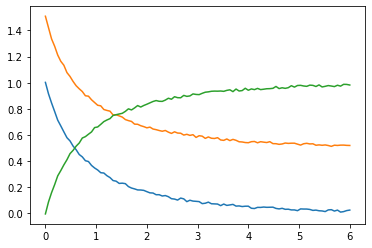

In [2]:
from pylab import *                               # chargement automatique des modules numpy et matplotlib
donnees = genfromtxt('Concentrations.txt')        # lecture des valeurs et stockage dans le tableau numpy donnees
print("La taille du tableau est : ", shape(donnees))
print(donnees)                                    # affichage
plot(donnees[:,0], donnees[:,1])                  # trace de la deuxieme colonne (A) en fonction de la premiere (t)
plot(donnees[:,0], donnees[:,2])                  # trace de la deuxieme colonne (B) en fonction de la premiere (t)
plot(donnees[:,0], donnees[:,3])                  # trace de la deuxieme colonne (C) en fonction de la premiere (t)

On voit que la méthode `genfromtxt` de Numpy crée un tableau Numpy 2D rempli avec toutes les colonnes.  

Ce cas était le plus simple pour plusieurs raisons. 

Premièrement, la ligne d'entête du fichier commence par `#` et `genfromtxt` ignore automatiquement les lignes qui commencent par `#`. Si vos lignes d'entête ne commencent pas par `#` (c'est à peu près toujours le cas) il faut dire à `genfromtxt` combien de lignes d'entête il y a pour qu'il les ignore. Cela se fait avec l'argument `skip_header=n` où il faut remplacer 'n' par le nombre de lignes d'entête. Cf exemple ci-dessous. 

Deuxièmement, des espaces séparent les colonnes. C'est le séparateur standard pour `genfromtxt`. Parfois les colonnes sont séparées par autre chose. Par exemple, dans les fichiers CSV, on utilise le plus souvent une virgule pour séparer les valeurs (CSV=Comma-Separated Values). Dans ce cas, il faut le spécifier à `genfromtxt` avec l'argument `delimiter='x'` où vous devez remplacer x par le caractère séparateur. Cf exemple ci-dessous. 

Enfin, le plus souvent, il est plus pratique de demander à `genfromtxt` de nous construire autant de vecteurs (ou tableaux 1D) qu'il y a de colonnes, au lieu de construire un grand tableau 2D. Pour ceci, on peut spécifier l'argument `unpack=True`. Dans ce cas, à gauche de `genfromtxt`il faut donner autant de noms de variables qu'il y a de colonnes dans le fichier. Cf exemple ci-dessous.

La taille des tableaux est :  (100,) (100,) (100,) (100,)


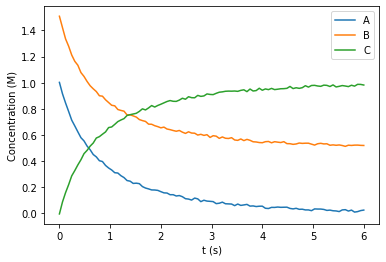

In [3]:
from pylab import *

t, A, B, C = genfromtxt('Concentrations.txt', skip_header=1, delimiter=' ', unpack=True)     # lecture des valeurs et stockage dans les 4 vecteurs t, A, B, C.
print("La taille des tableaux est : ", shape(t),shape(A),shape(B),shape(C))
plot(t, A, label='A') 
plot(t, B, label='B') 
plot(t, C, label='C') 
xlabel('t (s)')
ylabel('Concentration (M)')
legend()

Dans cet exemple, on a `skip_header=1` pour dire qu'il y a 1 ligne d'entête (même si ici ça ne sert à rien), `delimiter=' '` pour dire que les colonnes sont séparées par des espaces, et `unpack=True` pour dire qu'on veut des vecteurs et non un grand tableau 2D. Notez comme les appels à la fonction plot sont plus simples quand on dispose des variables t, A, B, C grâce à cette dernière option! 

La méthode de lecture de fichier ci-dessus est bien adaptée lorsque les données sont rangées sous forme d'un tableau dans le fichier. Parfois, ce n'est pas le cas et chaque ligne doit être analysée séparément. Pour lire un fichier arbitraire ligne par ligne, vous pouvez utiliser la construction suivante. 

In [4]:
for line in open('Concentrations.txt'):
    print(line)  

#          t (s)                 A (M)                       B (M)                   C (M) 

0.000000000000000000e+00 1.002420578808677076e+00 1.508765751350790607e+00 -4.379152307821003801e-03

6.060606060606060774e-02 9.149607988542877157e-01 1.421522038291903600e+00 8.720124177721891301e-02

1.212121212121212155e-01 8.447350244179753220e-01 1.335372299639328464e+00 1.584110103976936190e-01

1.818181818181818232e-01 7.797401419663776423e-01 1.279343206356261975e+00 2.195408913705814424e-01

2.424242424242424310e-01 7.134231494025577991e-01 1.211926341634596671e+00 2.867483006001840806e-01

3.030303030303030387e-01 6.692243513702980096e-01 1.163918368957667759e+00 3.273587866907773924e-01

3.636363636363636465e-01 6.236493102382180131e-01 1.133660714152036064e+00 3.710338885869863268e-01

4.242424242424242542e-01 5.791057065151586913e-01 1.077556700316525840e+00 4.102759793927115983e-01

4.848484848484848619e-01 5.543559551452812428e-01 1.047838159691048432e+00 4.569365531009166315e-0

Avec `for line in open('Concentrations.txt'):`, Python va automatiquement ouvrir le fichier indiqué dans `open`, lire ce fichier ligne par ligne en stockant le contenu de chaque ligne dans la variable `line`, et fermer le fichier à la fin de la boucle. 

Vous pouvez faire ce que vous voulez dans la boucle. Ici, nous avons simplement affiché chaque ligne lue. 

Notez que ces lignes sont des chaînes de caractères et non des réels. Si vous voulez créer des tableaux comme avec `genfromtxt`, il va falloir découper ces chaînes en listes de mots et transformer ces listes en listes de réels. Dans l'exemple ci dessous, on commence par créer 4 tableaux avec des zéros. On définit un compteur i. On lit chaque ligne. Si le caractère `#` n'est pas dans la ligne il s'agit de valeurs et on peut traiter les données. Il faut alors d'abord fractionner la chaîne `line` en liste de mots avec `line.split()`, puis la fonction `map` va appliquer la fonction `float()` à chaque élément de cette liste. Le résultat de `map()` est une liste de 4 réels, qu'on range dans `t[i]`, `A[i]`, etc. Il faut bien penser à incrémenter l'indice i pour la suite. C'est beaucoup plus de travail que `genfromtxt`, donc préférez cette dernière si possible. 

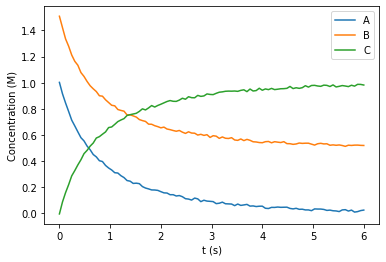

In [5]:
from pylab import *

t = zeros(100)
A = zeros(100)
B = zeros(100)
C = zeros(100)
i = 0
for line in open('Concentrations.txt'):
    if not '#' in line:
        t[i], A[i], B[i], C[i] = map( float, line.split() )
        i = i+1
plot(t, A, label='A') 
plot(t, B, label='B') 
plot(t, C, label='C') 
xlabel('t (s)')
ylabel('Concentration (M)')
legend()

NB : dans l'exemple ci-dessus, on commence à créer des tableaux `numpy` t, A, B, C directement avec des zéros. Ensuite, on remplace ces zéros en écrivant les données dans les bonnes cases.

Il est aussi possible d'utiliser des listes, mais si vous voulez faire des opérations sur ces listes il faudra au préalable les convertir en tableaux numpy. Voici un exemple avec des listes et une conversion à la fin. 

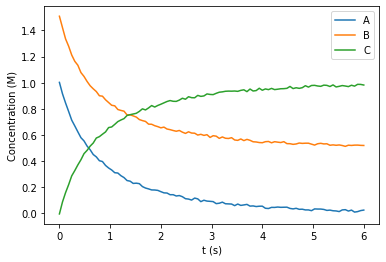

In [1]:
from pylab import *

t = [] # liste vide
A = []
B = []
C = []
for line in open('Concentrations.txt'):
    if not '#' in line:
        tt, aa, bb, cc = map( float, line.split() )
        t.append(tt)    # On ajoute les valeurs a la fin de la liste 
        A.append(aa)
        B.append(bb)
        C.append(cc)
t = array(t)            # conversion de la liste t en tableau numpy t
A = array(A)
B = array(B)
C = array(C)

plot(t, A, label='A') 
plot(t, B, label='B') 
plot(t, C, label='C') 
xlabel('t (s)')
ylabel('Concentration (M)')
legend()

Un avantage de cette méthode est qu'il n'y a plus besoin du compteur `i`, et qu'il n'y a pas besoin de connaître le nombre de lignes du fichier à l'avance. Un inconvénient est que ce n'est pas du tout optimal en termes de performances (rapidité du code). Quand on fait du Python, ce n'est pas un critère essentiel, mais ça peut l'être dans d'autres contextes. 

### Ecrire des données dans un fichier.

La manière la plus simple de sauvegrader vos données dans un fichier est d'utiliser la fonction `savetxt()`. Voici comment lire les variables, passer les concentrations en mM, et les sauvegarder dans un nouveau fichier appelé `ConcentrationsmM.txt`. 

In [6]:
from pylab import *                               
t, A, B, C = genfromtxt('Concentrations.txt', unpack=True)       # on lit t, A, B, C avec le minimum d'options requises
A = A*1000                                                       # multiplication par 1000 pour passer de M a mM
B = B*1000
C = C*1000 
savetxt('ConcentrationsmM.txt', transpose( (t,A,B,C) ) ) 

Le premier argument de la fonction `savetxt()` est le nom du fichier qui sera créé. Le second argument est un tableau numpy qui sera écrit dans le fichier. Comme nous avons 4 vecteurs, nous pouvons créer un taleau les rassemblant avec `(t,A,B,C)`. Il serait possible d'utiliser ce tableau dans `savetxt()` mais il serait stocké sous la forme de 4 lignes , la première pour t, la seconde pour A, etc, et non pas en colonnes. On utilise donc `transpose( (t,A,B,C) )` pour faire passer ce tableau 'horizontal' et un tableau 'vertical'. 

Si on doit écrire des données dans un fichier et qu'elles ne peuvent pas être rangées sous forme d'un tableau Numpy, c'est un peu plus difficile. Voici un exemple. 

In [7]:
from pylab import *                               
t, A, B, C = genfromtxt('Concentrations.txt', unpack=True)       # on lit t, A, B, C avec le minimum d'options requises
A = A*1000                                                       # multiplication par 1000 pour passer de M a mM
B = B*1000
C = C*1000 

fid = open('ConcentrationsmM.txt', 'w')                          # Ouverture d'un fichier en mode écriture ('w'=write)
for i in range(100):
    fid.write( "{:19.12e}".format(t[i])+' '+"{:19.12e}".format(A[i])+' '+"{:19.12e}".format(B[i])+' '+"{:19.12e}".format(C[i])+'\n' )
fid.close()                                                      # fermeture du fichier

Dans ce cas, il faut ouvrir explicitement le fichier à créer avec `open()` en indiquant son nom, ainsi que l'argument 'w' pour pouvoir écrire dedans ('w'=write). Cette commande crée une variable `fid` qui est la représentation du fichier en Python. A partir de là, il est possible d'utiliser `fid.write()` pour écrire une ligne dans le fichier mais cette fonction ne permet d'écrire que des chaînes de caractères. Il faut donc convertir nos 4 valeurs en 4 mots séparés par des espaces. L'instruction barbare `"{:19.12e}".format(X)` permet de convertir le réel `X` en une chaîne de 19 caractères dont 12 chiffres après la virgule, au format scientifique grâce au 'e'. Il est nécessaire d'écrire toutes les lignes individuellement grâce à une boucle. Enfin, il est impératif de fermer le fichier avec `fid.close()` à la fin, sans quoi les données ne seront peut être pas sauvegardées. Encore une fois, dans 95% des cas vous pouvez utiliser `savetxt()`, et il vaut mieux faire comme ça !

In [9]:
###############################################################################################
# supprimez cette cellule si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
###############################################################################################

vID.end(cwd0)

**Fin à:** Wednesday 09 November 2022, 11:40:15  
**Durée:** 00:00:26 461ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>